# Step 0: Import libraries

In [1]:
# import
import math
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import tarfile
import os
import urllib.request

from nltk.corpus import stopwords
from textblob import TextBlob

# download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Step 1: Download the IMDb movie review dataset

In [2]:
# Define the URL to download the dataset
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

# Define the directory to save the dataset
download_dir = "/content/imdb_dataset/"

# Create the directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download the dataset
urllib.request.urlretrieve(url, os.path.join(download_dir, "imdb_dataset.tar.gz"))

# Extract the dataset
with tarfile.open(os.path.join(download_dir, "imdb_dataset.tar.gz"), "r:gz") as tar:
    tar.extractall(path=download_dir)

print("IMDb dataset downloaded and extracted.")

IMDb dataset downloaded and extracted.


# Step 2: Read and tokenize the words in the reviews, lovercase all words, remove special characters and remove the stopwords.

In [3]:
dataset_dir = 'imdb_dataset/aclImdb/'

num_samples = 0
lengths = []
labels = []
reviews = []

stop_words = set(stopwords.words('english'))

for subdir in ['train/pos', 'train/neg', 'test/pos', 'test/neg']:
    for filename in os.listdir(dataset_dir + subdir):
        with open(dataset_dir + subdir + '/' + filename, 'r') as f:
            text = f.read()

            # Preprocess text
            text = text.lower()
            text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
            tokens = text.split()
            tokens = [token for token in tokens if token not in stop_words]

            num_samples += 1
            reviews.append(tokens)
            lengths.append(len(tokens))
            labels.append(subdir.split('/')[1])

lengths = sorted(lengths)

# Step 3: Calculate the number of data samples, the maximum, minimum, and average length of reviews, and create a chart showing the ratio of positive and negative classes in the dataset.

   Number of samples  Minimum length  Maximum length  Average length
0              50000               3            1449       122.77834


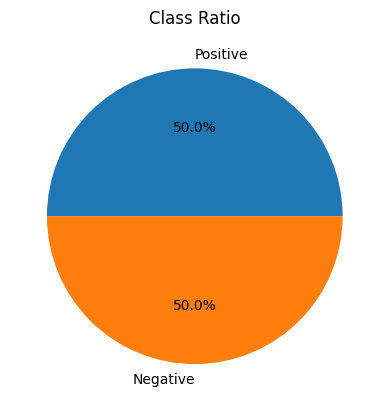

In [4]:
df = pd.DataFrame({
      'Number of samples': num_samples,
      'Minimum length': lengths[0],
      'Maximum length': lengths[-1],
      'Average length': sum(lengths)/len(lengths)
    }, index=[0])

print(df)

pos_ratio = len([l for l in labels if l=='pos']) / len(labels)
neg_ratio = len([l for l in labels if l=='neg']) / len(labels)

plt.pie([pos_ratio, neg_ratio], labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.title('Class Ratio')
plt.show()

# Step 4: Sentiment Analysis Implementation

In [5]:
sentiment = []

for review in reviews:
  analysis = TextBlob(" ".join(review))
  if analysis.sentiment.polarity > 0:
    sentiment.append(1)
  elif analysis.sentiment.polarity == 0:
    sentiment.append(0)
  else:
    sentiment.append(-1)

# Step 5: Results Visualization

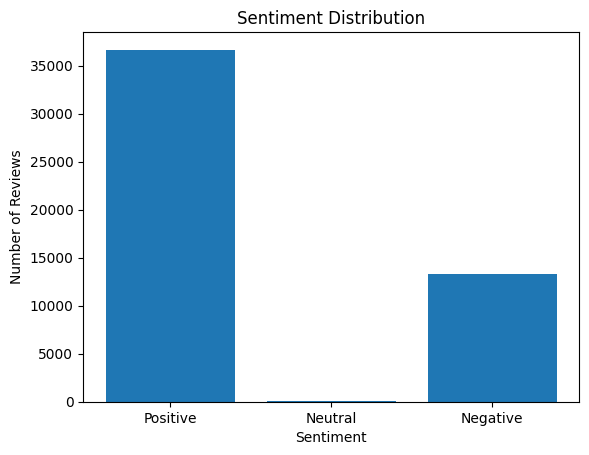

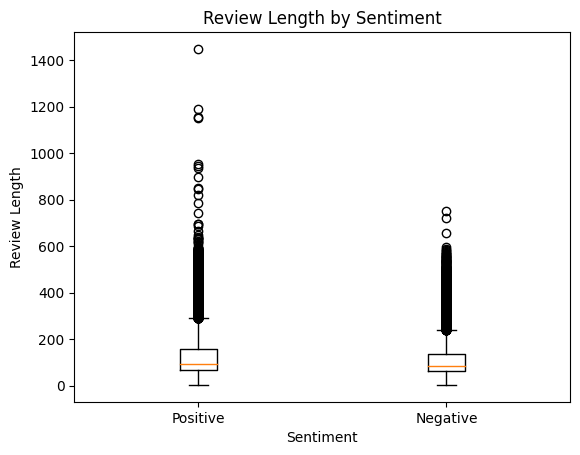

In [6]:
sentiment_counts = [sentiment.count(1), sentiment.count(0), sentiment.count(-1)]
sentiment_labels = ['Positive', 'Neutral', 'Negative']

plt.bar(sentiment_labels, sentiment_counts)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution')

pos_lengths = [len(review) for i, review in enumerate(reviews) if sentiment[i] == 1]
neg_lengths = [len(review) for i, review in enumerate(reviews) if sentiment[i] == -1]

plt.figure()
plt.boxplot([pos_lengths, neg_lengths], labels=['Positive', 'Negative'])
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.title('Review Length by Sentiment')

plt.show()

# Step 6: Write-up

In this project, I implemented sentiment analysis on the IMDb movie review dataset to classify reviews as positive or negative based on the text content. The first step was downloading and extracting the raw data which contains an equal number of positive and negative reviews split into train and test sets. Next, I preprocessed the text by converting to lowercase, removing punctuation and stopwords, and tokenizing into individual words. To analyze the dataset, I calculated statistics like the number of reviews, average length, and class balance.

For the core sentiment analysis, I used TextBlob to assign polarity scores to each review by aggregating the component word sentiments. Reviews with positive polarity were classified as positive sentiment, while those with negative polarity were deemed negative sentiment. Neutral reviews had a score of 0. By visualizing the sentiment distribution, we can see the class balance. Comparing positive and negative review lengths shows that negative reviews tend to be longer, indicating more detail provided for critical reviews. The sentiment analysis model can be improved in future work by training a more complex classifier, using more advanced text embeddings, and expanding to the full dataset. Overall, this project demonstrates a basic end-to-end sentiment analysis workflow from data preprocessing to visualization.